In [3]:
import os
os.getcwd()

'C:\\Users\\DELL\\Code'

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
df = pd.read_csv("hosteldata.csv")
df.head()

,Hid,HostelName,District,Place/City,HostelType,ManagerName,ManagerContact,SingleSeater,DoubleSeater,3Seater,4Seater,Ratings,Facilities,Description,Wifi,HotWater,Parking,Laundry,CCTV,Fan
0,1,Big Bell Boys Hostel,Bhaktapur,Tibukche Tol,Boys,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,3.0,"Wifi, Hot and Cold Water, Parking, Laundary, C...",This hostel has peacful environment,True,True,True,True,True,True
1,2,Friends Boys Hostel,Bhaktapur,Dokchee,Boys,Sujeet Raut,9.812038e+09,11000,10000,9000,8000,2.0,"Wifi, Hot and Cold Water, Parking, Laundary, Fan",This hostel has peacful environment,True,True,True,True,True,True
2,3,Golden Gate Boys Hostel,Bhaktapur,Talako,Boys,Sujeet Raut,9.812038e+09,13000,12000,11000,10000,4.0,"Wifi, Hot and Cold Water, Laundary, CCTV, Gym,...",This hostel has peacful environment,True,True,True,True,True,True
3,4,Ajima Girls Hostel,Bhaktapur,Ghakha,Girls,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,5.0,"Wifi, Hot and Cold Water, Parking, CCTV, Gym",This hostel has peacful environment,True,True,True,True,True,True
4,5,Manjushree Girls Hostel,Bhaktapur,Dudhpati,Girls,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,1.0,"Wifi, Hot and Cold Water, Parking",This hostel has peacful environment,True,True,True,True,True,True


In [6]:
features = ["HostelName", "District", "Place/City", "HostelType", "SingleSeater", "DoubleSeater", "3Seater", "4Seater", "Wifi",
            "HotWater", "Parking", "Laundry", "CCTV", "Fan"]

all_features = []
for index, row in df.iterrows():
  hostel_features = []
  for feature in features:
    hostel_features.append(row[feature])
  hostel_features = [str(feature) for feature in hostel_features]
  all_features.append(" ".join(hostel_features))
    
print(all_features)


['Big Bell Boys Hostel Bhaktapur Tibukche Tol Boys 12000 11000 10000 9000 True True True True True True', 'Friends Boys Hostel Bhaktapur Dokchee Boys 11000 10000 9000 8000 True True True True True True', 'Golden Gate Boys Hostel Bhaktapur Talako Boys 13000 12000 11000 10000 True True True True True True', 'Ajima Girls Hostel Bhaktapur Ghakha Girls 12000 11000 10000 9000 True True True True True True', 'Manjushree Girls Hostel Bhaktapur Dudhpati Girls 12000 11000 10000 9000 True True True True True True', 'Swastik Boys Hostel Bhaktapur Coche Tol Boys 12000 11000 10000 9000 True True True True True True', 'Sweet Home Girls Hostel Bhaktapur Lasku Dhoka Girls 12000 11000 10000 9000 True True True True True True', 'Pagoda Boys Hostel Bhaktapur Taumadhi Square Boys 12000 11000 10000 9000 True True True False True True', 'Subha Girls Hostel Bhaktapur Pottery Square Girls 12000 11000 10000 9000 True True True False True True', 'Siddhi Laxmi Girls Hostel Bhaktapur Kwache Tol Girls 12000 11000 1

In [7]:
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(all_features)
# print(feature_matrix)
import matplotlib.pyplot as plt

In [14]:
import matplotlib.pyplot as plt

def get_recommendations(HostelName, District, Place_City, HostelType, SingleSeater, DoubleSeater, ThreeSeater, FourSeater, Wifi,
                        HotWater, Parking, Laundry, CCTV, Fan):
    # Convert the booleans to strings
    Wifi = str(Wifi)
    HotWater = str(HotWater)
    Parking = str(Parking)
    Laundry = str(Laundry)
    CCTV = str(CCTV)
    Fan = str(Fan)

    # Create a list of the user's input
    input_features = [HostelName, District, Place_City, HostelType, SingleSeater, DoubleSeater, ThreeSeater, FourSeater, Wifi,
                      HotWater, Parking, Laundry, CCTV, Fan]
    print(input_features)

    # Use CountVectorizer to convert the input into a matrix of token counts
    input_matrix = vectorizer.transform([" ".join(input_features)])
    
    # Calculate the cosine similarity between the input and all hostels
    similarity = cosine_similarity(input_matrix, feature_matrix)
    print(similarity)
    
    # Get the indices of the top 20 most similar hostels
    most_similar = similarity.argsort()[0][-61:-1][::-1]
    
    # Add similarity values to dataframe
    df['similarity'] = similarity[0]
    
    # Plot a graph of similarity values against hostel names
    plt.figure(figsize=(12,6))
    plt.bar(df.iloc[most_similar]['HostelName'], df.iloc[most_similar]['similarity'])
    plt.xticks(rotation=90)
    plt.xlabel('Hostel Name')
    plt.ylabel('Similarity')
    plt.title('Cosine Similarity of Hostels')
    plt.show()

    # Return a list of the top 5 most similar hostels
    return df.iloc[most_similar][:5]


['', 'Lalitpur', 'Satdobato', 'Boys', '0', '0', '0', '12000', '[True]', '[False]', '[True]', '[True]', '[True]', '[False]']
[[0.77942286 0.76603235 0.78733599 0.73656956 0.73656956 0.78733599
  0.72168784 0.81715056 0.75177852 0.73514704 0.82994101 0.76160611
  0.82994101 0.67115606 0.73827166 0.72168784 0.78173596 0.77015405
  0.71066905 0.74620251 0.87181275 0.83390785 0.82495791 0.81009259
  0.84322091 0.87181275 0.87181275 0.87181275 0.8660254  0.85715939
  0.79385662 0.79385662 0.81989159 0.79600295 0.75777223 0.75777223
  0.79600295 0.82994101 0.79385662 0.79471941 0.82783272 0.79471941
  0.82783272 0.81715056 0.81715056 0.79549513 0.77942286 0.78733599
  0.77942286 0.79549513 0.73656956 0.73656956 0.73656956 0.70710678
  0.70710678 0.70710678 0.70710678 0.75177852 0.7284928  0.76160611
  0.82783272 0.79471941 0.79471941 0.79471941 0.81715056 0.79471941
  0.78446454 0.78446454 0.82783272 0.78247589 0.76160611 0.7284928
  0.75177852 0.7284928  0.7284928  0.7284928  0.7284928  0.76

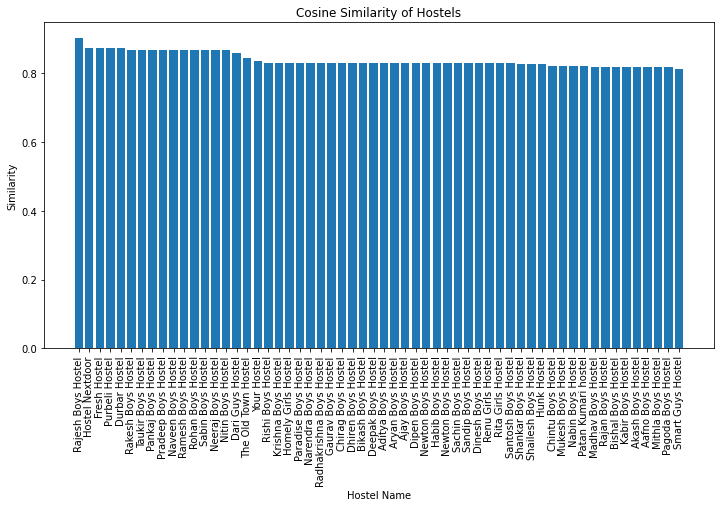

,Hid,HostelName,District,Place/City,HostelType,ManagerName,ManagerContact,SingleSeater,DoubleSeater,3Seater,...,Ratings,Facilities,Description,Wifi,HotWater,Parking,Laundry,CCTV,Fan,similarity
168,169,Rajesh Boys Hostel,Lalitpur,Satdobato,Boys,NaN,NaN,12000,11000,10000,...,NaN,"Wifi, Hot and Cold Water, Parking, Laundary",NaN,True,False,True,True,True,False,0.902110
20,21,Hostel Nextdoor,Lalitpur,Chakupath,Boys,Buddha Singh Subba,NaN,12000,11000,10000,...,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, C...",NaN,True,True,True,False,True,False,0.871813
25,26,Fresh Hostel,Lalitpur,Kupondole,Boys,Buddha Singh Subba,NaN,12000,11000,10000,...,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, CCTV",NaN,True,False,True,True,True,False,0.871813
26,27,Purbeli Hostel,Lalitpur,Kupondole,Boys,Buddha Singh Subba,NaN,12000,11000,10000,...,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, CCTV",NaN,True,False,True,True,True,False,0.871813
27,28,Durbar Hostel,Lalitpur,Chakupath,Boys,Buddha Singh Subba,NaN,12000,11000,10000,...,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, CCTV",NaN,True,False,True,True,True,False,0.871813


In [15]:
get_recommendations(HostelName='', District='Lalitpur', Place_City='Satdobato', HostelType='Boys',SingleSeater='0', 
                    DoubleSeater='0', ThreeSeater='0', FourSeater='12000', Wifi=[True],
                        HotWater=[False], Parking=[True], Laundry=[True], CCTV=[True], Fan=[False])